In [1]:
#!pip install scikit-learn
from sklearn.datasets import load_wine
wine = load_wine()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
(178, 13)
(178,)
tensor([1.3200e+01, 1.7800e+00, 2.1400e+00, 1.1200e+01, 1.0000e+02, 2.6500e+00,
        2.7600e+00, 2.6000e-01, 1.2800e+00, 4.3800e+00, 1.0500e+00, 3.4000e+00,
        1.0500e+03])
tensor(0)
Epoch 0 Train Loss: 7.0155863761901855 Test Loss: 11.816423416137695 
Epoch 100 Train Loss: 0.5101118683815002 Test Loss: 7.290312767028809 
Epoch 200 Train Loss: 0.4214370846748352 Test Loss: 5.170661449432373 
Epoch 300 Train Loss: 0.3514251112937927 Test Loss: 5.643611907958984 
Epoch 400 Train Loss: 0.3132382333278656 Test Loss: 6.328601360321045 
Epoch 500 Train Loss: 0.29512572288513184 Test Loss: 6.807233810424805 
Epoch 600 Train Loss: 0.2816993296146393 Test Loss: 7.260745525360107 
Epoch 700 Train Loss: 0.2652116119861603 Test Loss: 7.733016014099121 
Epoch 800 Train Loss: 0.2595241367816925 Test Loss: 8.058835983276367 
Epoch 900 Train Loss: 0.24968111515045166 Test Loss: 8.434120178222656 


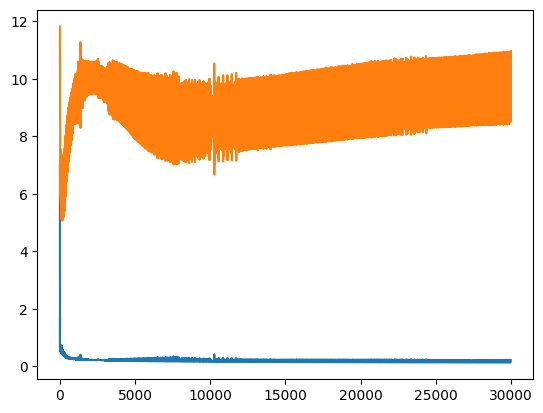

In [23]:
print(wine.keys())
X = wine["data"]
Y = wine["target"]
feature_names = wine["feature_names"]

print(X.shape), print(Y.shape)

train_len = int(len(X) * 0.7)
X_train = X[:train_len]
X_test = X[train_len:]
Y_train = Y[:train_len]
Y_test = Y[train_len:]

import torch
from torch import nn

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
Y_test = torch.tensor(Y_test, dtype=torch.long)

device = "cuda" if torch.cuda.is_available() else "cpu"
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

print(X_train[1]), print(Y_train[1])

hidden_layer = 10
class WineClassifier(nn.Module):
    def __init__(self,hidden_layer):
        super().__init__()
        self.layer1 = nn.Linear(13, hidden_layer)
        self.layer2 = nn.Linear(hidden_layer, hidden_layer)
        self.layer3 = nn.Linear(hidden_layer, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
        # x = self.layer1(x)
        # x = torch.relu(x)
        # x = self.layer2(x)
        # x = torch.relu(x)
        # x = self.layer3(x)
        # x = self.softmax(x)
        # return x
    
    
model = WineClassifier(hidden_layer).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
epochs = 30000

epoch_list = []
loss_list = []
test_loss_list = []

for epoch in range(epochs):
    model.train()
    Y_pred = model(X_train)
    y_pred = torch.softmax(Y_pred, dim=1).argmax(dim=1)
    #print(f"Value of y_prediction: {y_pred.dtype}")
    #print(f"Value of Y_Train: {Y_train.dtype}")
    loss = loss_fn(Y_pred, Y_train)
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        Y_pred_test = model(X_test)
        test_pred = torch.softmax(Y_pred_test, dim=1).argmax(dim=1)
        test_loss = loss_fn(Y_pred_test, Y_test)
        test_loss_list.append(test_loss.item())
        if epoch % 100 == 0:
            print(f"Epoch {epoch} Train Loss: {loss.item()} Test Loss: {test_loss.item()} ")

#!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list, label="Train Loss")
plt.plot(epoch_list, test_loss_list, label="Test Loss")
    



In [24]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10201x2 and 13x10)

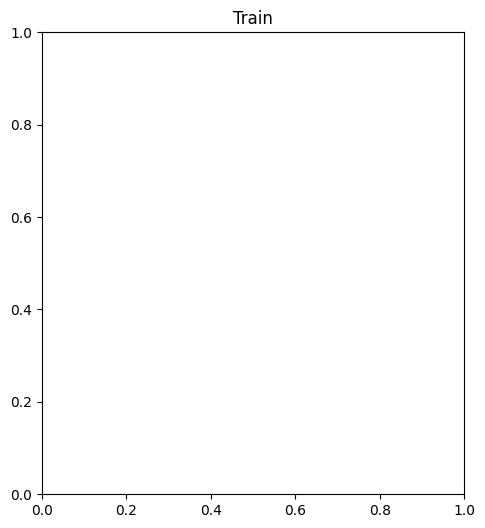

In [27]:


# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, Y_test)

